In [1]:
import pandas as pd


data = pd.read_csv("data.csv")

In [2]:
# 인덱스를 이용해 12개씩 묶기
data['day_group'] = (data.index//12)+1

# 컬럼명 리스트 생성 (날짜나 그룹 컬럼은 제외)
numeric_columns = data.select_dtypes(include='number').columns

# 모든 컬럼에 대해 max를 계산
aggregations = {col: ['std'] for col in numeric_columns}


In [3]:
# 그룹별 수치 계산 (mean, max, min)
grouped_data = data.groupby('day_group').agg(aggregations)

In [4]:
grouped_data = grouped_data.reset_index()
# grouped_data.columns = [f'{col}' if col[1] else col[0] for col in grouped_data.columns]

In [5]:
grouped_data = grouped_data.iloc[:, 2:len(grouped_data.columns)-1]

In [6]:
grouped_data

,temperature,voltage,rms_x,rms_y,rms_z,rms_xyz,vel_rms_x,vel_rms_y,vel_rms_z,vel_rms_xyz,...,peak_z,vel_peak_x,vel_peak_y,vel_peak_z,peak2peak_x,peak2peak_y,peak2peak_z,vel_peak2peak_x,vel_peak2peak_y,vel_peak2peak_z
,std,std,std,std,std,std,std,std,std,std,...,std,std,std,std,std,std,std,std,std,std
0,2.269695,0.001898,0.012164,0.010773,0.009953,0.018560,0.100703,0.103437,0.052673,0.130320,...,0.033429,0.455733,0.409297,0.186925,0.067873,0.074158,0.058618,0.784662,0.704123,0.401455
1,2.094365,0.002038,0.017844,0.019994,0.021383,0.033711,0.146851,0.186228,0.065638,0.219676,...,0.059517,0.486396,0.630244,0.207258,0.099745,0.123552,0.115686,0.934239,1.160981,0.430116
2,0.852803,0.001906,0.016610,0.031144,0.017037,0.038242,0.332232,0.584573,0.088714,0.635957,...,0.053841,1.044237,1.493738,0.418159,0.112378,0.206412,0.100716,1.819658,2.932185,0.692686
3,2.329000,0.002710,0.017595,0.023167,0.017738,0.033197,0.274923,0.356903,0.067665,0.409846,...,0.059932,0.808858,1.345340,0.260405,0.109315,0.174632,0.109062,1.430945,2.259659,0.476172
4,3.528026,0.002583,0.019114,0.021367,0.014135,0.031344,0.263989,0.243670,0.069357,0.337424,...,0.049558,0.757583,0.757282,0.239084,0.121068,0.146803,0.094655,1.441812,1.326883,0.473201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1.614330,0.000897,0.019254,0.017688,0.019859,0.032277,0.159448,0.148881,0.164667,0.260131,...,0.060423,0.752602,0.421580,0.507572,0.126785,0.111495,0.115591,1.317395,0.798936,0.912749
235,1.669694,0.000968,0.018537,0.013060,0.014199,0.025722,0.144745,0.093304,0.066943,0.162559,...,0.047778,0.459044,0.365597,0.227553,0.105512,0.089282,0.089612,0.832290,0.670349,0.393765
236,2.405801,0.001336,0.021994,0.018545,0.021040,0.035172,0.305516,0.180106,0.095633,0.331120,...,0.078069,1.612342,1.070804,0.402562,0.139149,0.125797,0.148683,2.511764,2.004968,0.718700


In [7]:
target = pd.read_csv('target.csv')
target['time'] = pd.to_datetime(target['time'])
target = target.sort_values(by='time')
target = target.reset_index(drop=True)

In [8]:
target.columns

Index(['asset_id', 'time', 'imbalance_health', 'misalignment_health',
       'looseness_health', 'bearing_health', 'asset_health', 'CRT_DT'],
      dtype='object')

In [9]:
target = target.iloc[:,[6]]

In [10]:
target = target.fillna(0)

In [11]:
target.loc[len(target)] = {"asset_health":0}

In [12]:
X = grouped_data
y = target

In [13]:
print(len(X), len(y))

239 239


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\user\anaconda3\envs\torch-gpu\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(-1.0, 40.0)

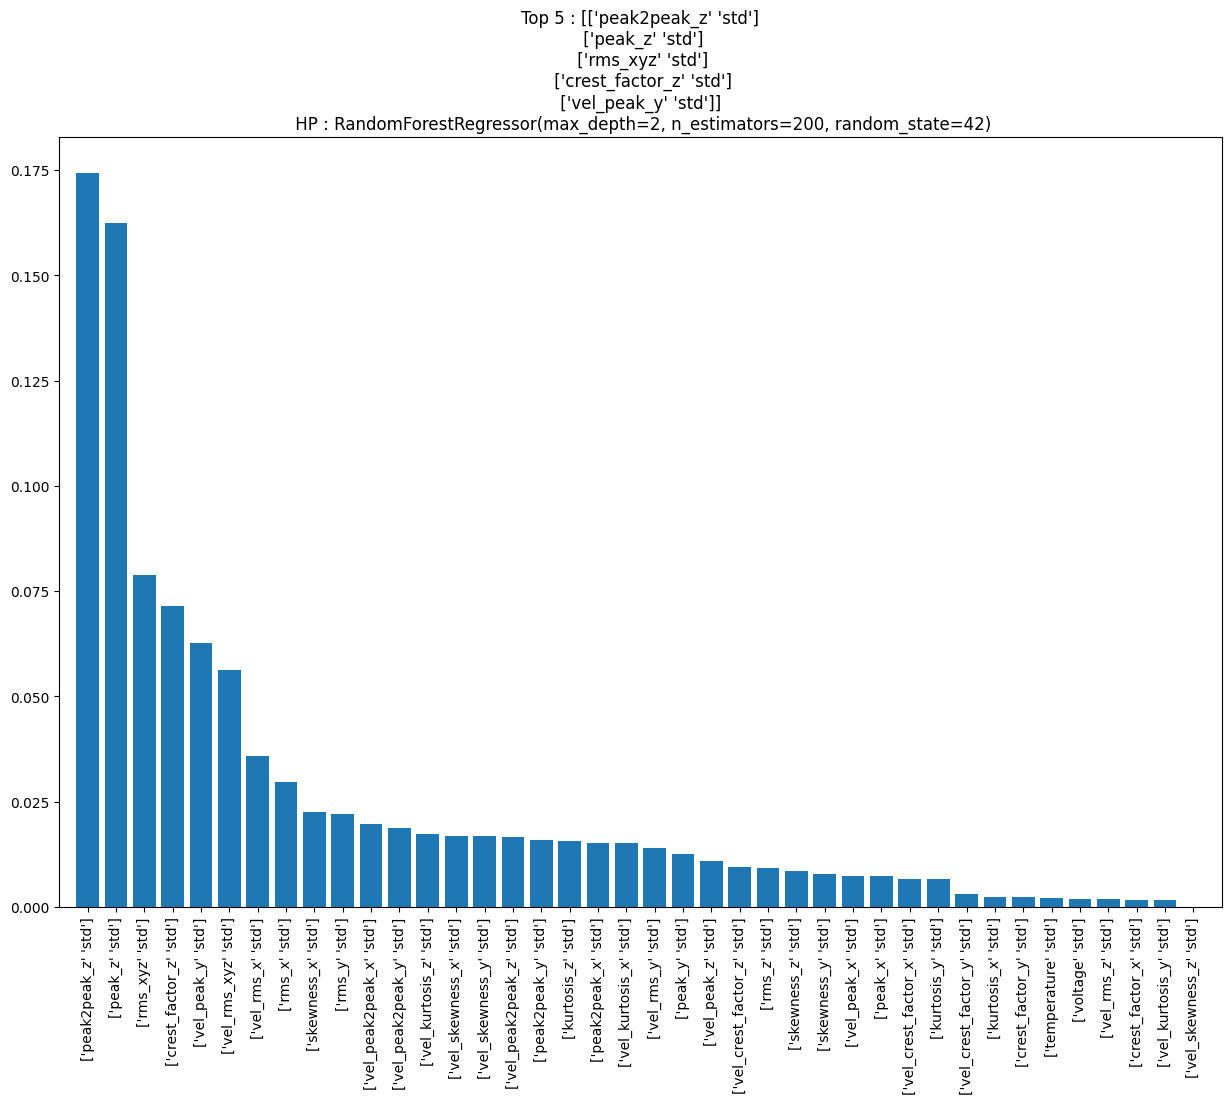

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

features = X.columns.to_list()

# 랜덤 포레스트 회귀 모델 학습
param_grid = {
    'max_depth': [2],
    'n_estimators':[200],
    'random_state':[42]
}

# GridSearchCV 객체 생성
reg = RandomForestRegressor()
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X, y)

grid_imp = grid_search.best_estimator_.feature_importances_

indices = np.argsort(grid_imp)[::-1]

# 시각화
plt.figure(figsize=(15, 10))
plt.title(f'Top 5 : {np.array(features)[indices[:5]]} \n HP : {grid_search.best_estimator_}')
plt.bar(range(X.shape[1]), grid_imp[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])